In [5]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split



In [6]:
dataset=pd.read_csv('./Salary_Data.csv')

In [7]:
dataset.head()

,YearsExperience,Age,Salary
0,1.1,21.0,39343
1,1.3,21.5,46205
2,1.5,21.7,37731
3,2.0,22.0,43525
4,2.2,22.2,39891


In [8]:
x=dataset.iloc[:,:-1]
y=dataset['Salary']

In [9]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=21)

In [10]:
from sklearn.tree import DecisionTreeRegressor

In [11]:
dt=DecisionTreeRegressor()

<Axes: xlabel='YearsExperience', ylabel='Age'>

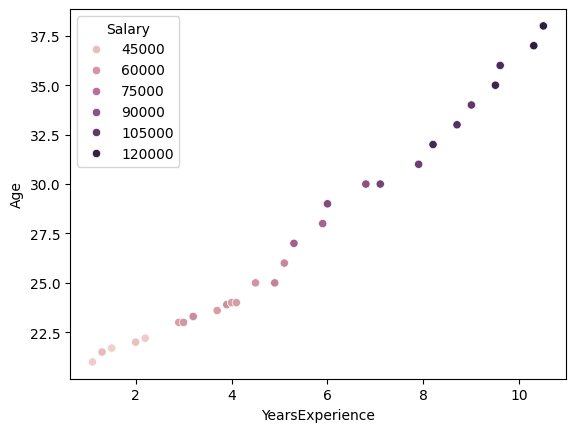

In [12]:
sns.scatterplot(x='YearsExperience', y='Age', data=dataset,hue='Salary')


In [13]:
dt.fit(x_train,y_train)

DecisionTreeRegressor()

In [14]:
dt.score(x_test,y_test)

0.9364124987633551

In [15]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

In [16]:
df={
    "criterion":['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
    "splitter":["best","random"],
    "max_depth":[i for i in range(2,20)]
    }

In [17]:
4*2*18

144

In [18]:
gd=GridSearchCV(DecisionTreeRegressor(),param_grid=df)

In [19]:
gd.fit(x_train, y_train)

GridSearchCV(estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error', 'poisson'],
                         'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,
                                       14, 15, 16, 17, 18, 19],
                         'splitter': ['best', 'random']})

In [20]:
gd.best_params_

{'criterion': 'poisson', 'max_depth': 4, 'splitter': 'best'}

In [21]:
dt1=DecisionTreeRegressor(criterion='squared_error',max_depth=4,splitter='best')

In [22]:
dt1.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=4)

In [23]:
dt1.score(x_test, y_test)

0.95651208443338

In [24]:
dt1.score(x_train, y_train)

0.9939200832494793

In [25]:
gd.best_score_

0.961617489469428

In [26]:
rd=RandomizedSearchCV(DecisionTreeRegressor(),param_distributions=df,n_iter=20)

In [27]:
rd.fit(x_train,y_train)

RandomizedSearchCV(estimator=DecisionTreeRegressor(), n_iter=20,
                   param_distributions={'criterion': ['squared_error',
                                                      'friedman_mse',
                                                      'absolute_error',
                                                      'poisson'],
                                        'max_depth': [2, 3, 4, 5, 6, 7, 8, 9,
                                                      10, 11, 12, 13, 14, 15,
                                                      16, 17, 18, 19],
                                        'splitter': ['best', 'random']})

In [28]:
rd.score(x_test,y_test)

0.9365503986875712

In [29]:
rd.score(x_train,y_train)

0.9967369871728857

In [30]:
rd.best_params_

{'splitter': 'best', 'max_depth': 9, 'criterion': 'friedman_mse'}